<a href="https://colab.research.google.com/github/Sayma-sudo/senulationlab/blob/main/lab_7%2Ctask_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean: 76.90
Population Variance: 136.09
Sample Variance: 143.25
Sample Standard Deviation: 11.97


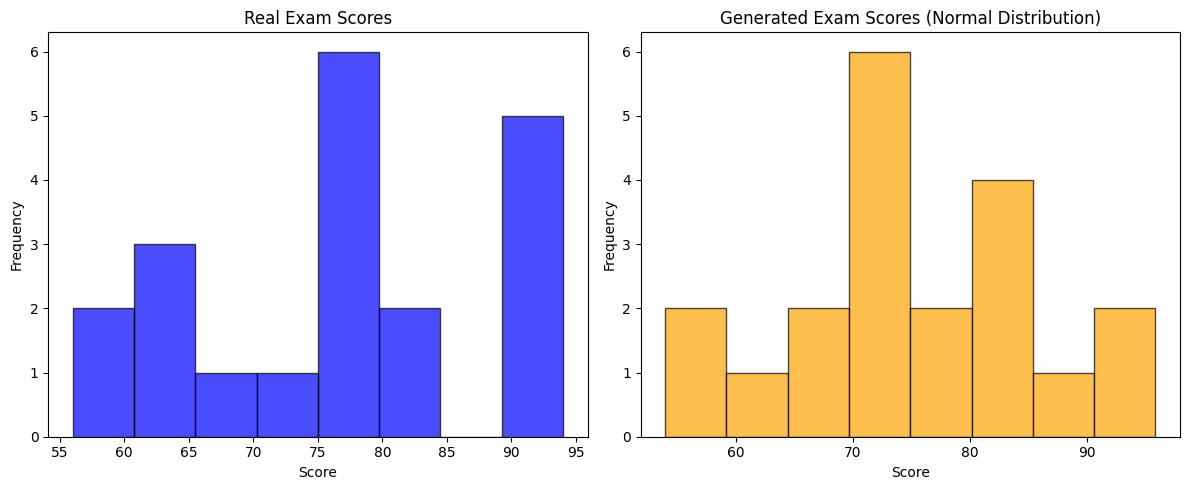

Estimated Probability that score ≥ 75: 0.5637

Hypothesized Mean: 73
T-statistic: 1.457
P-value: 0.1614
Conclusion: Fail to reject the null hypothesis.


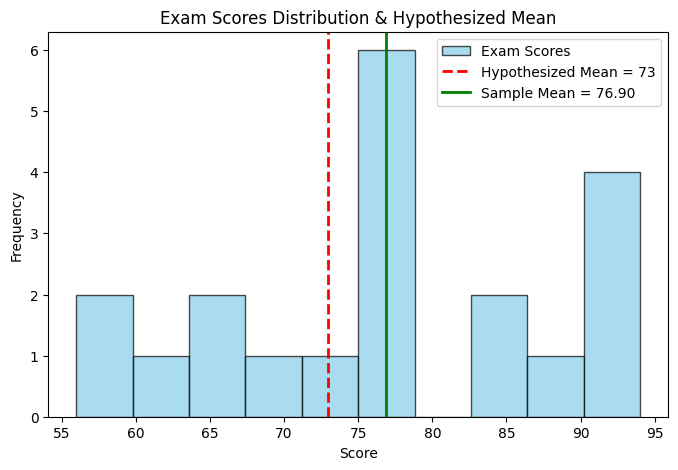


Interpretation:
The data does not provide sufficient evidence to conclude the average exam score is different from 73.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given Data
scores = np.array([93,83,69,62,75,93,73,77,65,65,78,90,94,78,57,76,56,78,84,92])

# 1. Basic Stats
mean_score = np.mean(scores)
var_population = np.var(scores)          # population variance (ddof=0)
var_sample = np.var(scores, ddof=1)      # sample variance (ddof=1)
std_dev = np.std(scores, ddof=1)         # sample std deviation

print(f"Mean: {mean_score:.2f}")
print(f"Population Variance: {var_population:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Sample Standard Deviation: {std_dev:.2f}")

# 2. Random Number Generation
np.random.seed(42)  # For reproducibility
generated_scores = np.random.normal(loc=mean_score, scale=std_dev, size=20)

# Plot histograms side by side
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(scores, bins=8, alpha=0.7, color='blue', edgecolor='black')
plt.title("Real Exam Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(generated_scores, bins=8, alpha=0.7, color='orange', edgecolor='black')
plt.title("Generated Exam Scores (Normal Distribution)")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 3. Monte Carlo Simulation
sim_samples = np.random.normal(loc=mean_score, scale=std_dev, size=100000)
prob_ge_75 = np.mean(sim_samples >= 75)
print(f"Estimated Probability that score ≥ 75: {prob_ge_75:.4f}")

# 4. Hypothesis Testing
# Replace last_three_digits with your actual last 3 digits of ID
last_three_digits = 123  # <-- replace this with your actual last 3 digits
hypothesized_mean = (last_three_digits % 50) + 50

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(scores, hypothesized_mean)
print(f"\nHypothesized Mean: {hypothesized_mean}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis."
else:
    conclusion = "Fail to reject the null hypothesis."

print(f"Conclusion: {conclusion}")

# Visualization of Hypothesis Test
plt.figure(figsize=(8,5))
plt.hist(scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black', label='Exam Scores')
plt.axvline(hypothesized_mean, color='red', linestyle='--', linewidth=2, label=f'Hypothesized Mean = {hypothesized_mean}')
plt.axvline(mean_score, color='green', linestyle='-', linewidth=2, label=f'Sample Mean = {mean_score:.2f}')
plt.title('Exam Scores Distribution & Hypothesized Mean')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Unique Interpretation
if conclusion == "Reject the null hypothesis.":
    interpretation = f"The data provides sufficient evidence to conclude the average exam score is different from {hypothesized_mean}."
else:
    interpretation = f"The data does not provide sufficient evidence to conclude the average exam score is different from {hypothesized_mean}."

print("\nInterpretation:")
print(interpretation)
